<a href="https://colab.research.google.com/github/rdinesh1/FoodInsecurity_capstone/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
dfraw = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone Project Research SP 2022/Food_insecurity_research/raw_data.csv')

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [5]:
dfraw.head()

,CensusTract,State,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,LILATracts_Vehicle,HUNVFlag,LowIncomeTracts,PovertyRate,MedianFamilyIncome,LA1and10,LAhalfand10,LA1and20,LATracts_half,LATracts1,LATracts10,LATracts20,LATractsVehicle_20,LAPOP1_10,LAPOP05_10,LAPOP1_20,LALOWI1_10,LALOWI05_10,LALOWI1_20,lapophalf,lapophalfshare,lalowihalf,lalowihalfshare,lakidshalf,lakidshalfshare,laseniorshalf,laseniorshalfshare,lawhitehalf,...,lasnap10,lasnap10share,lapop20,lapop20share,lalowi20,lalowi20share,lakids20,lakids20share,laseniors20,laseniors20share,lawhite20,lawhite20share,lablack20,lablack20share,laasian20,laasian20share,lanhopi20,lanhopi20share,laaian20,laaian20share,laomultir20,laomultir20share,lahisp20,lahisp20share,lahunv20,lahunv20share,lasnap20,lasnap20share,TractLOWI,TractKids,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,1001020100,Alabama,Autauga County,1,1912,693,0,0.0,0.00,0,0,0,0,0,0,11.3,81250.0,1,1,1,1,1,0,0,0,1896.0,1912.0,1896.0,461.0,467.0,461.0,1912.0,100.00,467.0,24.42,507.0,26.52,221.0,11.56,1622.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,455.0,507.0,221.0,1622.0,217.0,14.0,0.0,14.0,45.0,44.0,6.0,102.0
1,1001020200,Alabama,Autauga County,1,2170,743,0,181.0,8.34,1,1,1,0,0,1,17.9,49000.0,1,1,1,1,1,0,0,0,1261.0,2170.0,1261.0,604.0,962.0,604.0,2170.0,100.00,962.0,44.34,606.0,27.93,214.0,9.86,888.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,802.0,606.0,214.0,888.0,1217.0,5.0,0.0,5.0,55.0,75.0,89.0,156.0
2,1001020300,Alabama,Autauga County,1,3373,1256,0,0.0,0.00,0,0,0,0,0,0,15.0,62609.0,1,1,1,1,1,0,0,0,1552.0,2857.0,1552.0,478.0,971.0,478.0,2857.0,84.70,971.0,28.79,771.0,22.86,358.0,10.60,2177.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1306.0,894.0,439.0,2576.0,647.0,17.0,5.0,11.0,117.0,87.0,99.0,172.0
3,1001020400,Alabama,Autauga County,1,4386,1722,0,0.0,0.00,0,0,0,0,0,0,2.8,70607.0,1,1,1,1,1,0,0,0,1363.0,3651.0,1363.0,343.0,893.0,343.0,3651.0,83.24,893.0,20.36,847.0,19.30,767.0,17.48,3395.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,922.0,1015.0,904.0,4086.0,193.0,18.0,4.0,11.0,74.0,85.0,21.0,98.0
4,1001020500,Alabama,Autauga County,1,10766,4082,0,181.0,1.68,0,0,0,0,1,0,15.2,96334.0,1,1,1,1,1,0,0,1,2643.0,7778.0,2643.0,586.0,1719.0,586.0,7778.0,72.25,1719.0,15.97,2309.0,21.45,840.0,7.80,6299.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2242.0,3162.0,1126.0,8666.0,1437.0,296.0,9.0,48.0,310.0,355.0,230.0,339.0


In [6]:
for col in dfraw.columns:
    print(col)

CensusTract
State
County
Urban
Pop2010
OHU2010
GroupQuartersFlag
NUMGQTRS
PCTGQTRS
LILATracts_1And10
LILATracts_halfAnd10
LILATracts_1And20
LILATracts_Vehicle
HUNVFlag
LowIncomeTracts
PovertyRate
MedianFamilyIncome
LA1and10
LAhalfand10
LA1and20
LATracts_half
LATracts1
LATracts10
LATracts20
LATractsVehicle_20
LAPOP1_10
LAPOP05_10
LAPOP1_20
LALOWI1_10
LALOWI05_10
LALOWI1_20
lapophalf
lapophalfshare
lalowihalf
lalowihalfshare
lakidshalf
lakidshalfshare
laseniorshalf
laseniorshalfshare
lawhitehalf
lawhitehalfshare
lablackhalf
lablackhalfshare
laasianhalf
laasianhalfshare
lanhopihalf
lanhopihalfshare
laaianhalf
laaianhalfshare
laomultirhalf
laomultirhalfshare
lahisphalf
lahisphalfshare
lahunvhalf
lahunvhalfshare
lasnaphalf
lasnaphalfshare
lapop1
lapop1share
lalowi1
lalowi1share
lakids1
lakids1share
laseniors1
laseniors1share
lawhite1
lawhite1share
lablack1
lablack1share
laasian1
laasian1share
lanhopi1
lanhopi1share
laaian1
laaian1share
laomultir1
laomultir1share
lahisp1
lahisp1share
lahunv1

In [7]:
var_list = pd.read_csv("variable_list.csv")

FileNotFoundError: ignored

In [ ]:
var_list

In [15]:
flag_cols = ['CensusTract','State','County','LATracts1','LATracts_half','LATracts10','LATracts20','LowIncomeTracts',
'LILATracts_Vehicle',
'HUNVFlag',
'LATractsVehicle_20',
'GroupQuartersFlag',
'Urban']


base_flags = ['LATracts1','LATracts_half','LATracts10','LATracts20']

In [59]:
df = dfraw.drop(columns=[col for col in dfraw if col not in flag_cols])


In [60]:
df.loc[df['LATracts1'] == 1, 'LATracts_half'] = 0 # cleaning redundancy between half and 1 mile low access

df.loc[df['LATracts20']== 1, 'LATracts10'] = 0 # cleaning redundancy between 10 and 20 mile low access

In [58]:
df[df['Urban'] == 1][df['LATracts10'] == 1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,CensusTract,State,County,Urban,GroupQuartersFlag,LILATracts_Vehicle,HUNVFlag,LowIncomeTracts,LATracts_half,LATracts1,LATracts10,LATracts20,LATractsVehicle_20


In [75]:
df.tail()

,CensusTract,State,County,Urban,GroupQuartersFlag,LILATracts_Vehicle,HUNVFlag,LowIncomeTracts,LATracts_half,LATracts1,LATracts10,LATracts20,LATractsVehicle_20
72526,56043000200,Wyoming,Washakie County,0,0,0,0,0,0,0,0,1,1
72527,56043000301,Wyoming,Washakie County,1,0,0,0,0,1,0,0,0,0
72528,56043000302,Wyoming,Washakie County,1,0,0,0,0,1,0,0,0,0
72529,56045951100,Wyoming,Weston County,0,0,0,0,0,0,0,1,0,0
72530,56045951300,Wyoming,Weston County,1,0,0,0,0,0,1,0,0,0


In [11]:
df.describe()

,CensusTract,Urban,GroupQuartersFlag,LILATracts_Vehicle,HUNVFlag,LowIncomeTracts,LATracts_half,LATracts1,LATracts10,LATracts20,LATractsVehicle_20
count,7.253100e+04,72531.000000,72531.000000,72531.000000,72531.000000,72531.000000,72531.000000,72531.000000,72531.000000,72531.000000,72531.000000
mean,2.782573e+10,0.760626,0.007114,0.139609,0.210820,0.417573,0.302946,0.335884,0.039142,0.004784,0.214750
std,1.581647e+10,0.426704,0.084046,0.346584,0.407894,0.493162,0.459535,0.472302,0.193934,0.069002,0.410651
min,1.001020e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.212708e+10,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.712979e+10,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.103900e+10,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,5.604595e+10,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


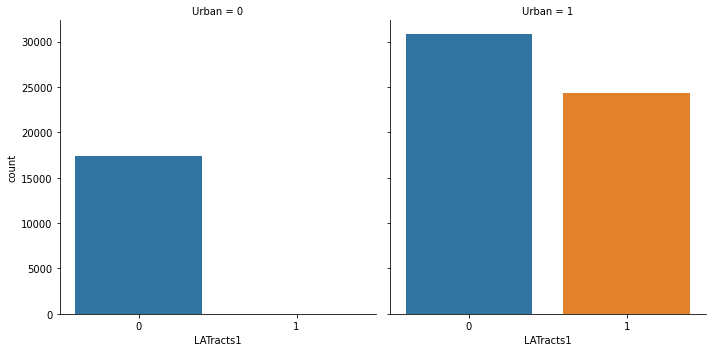

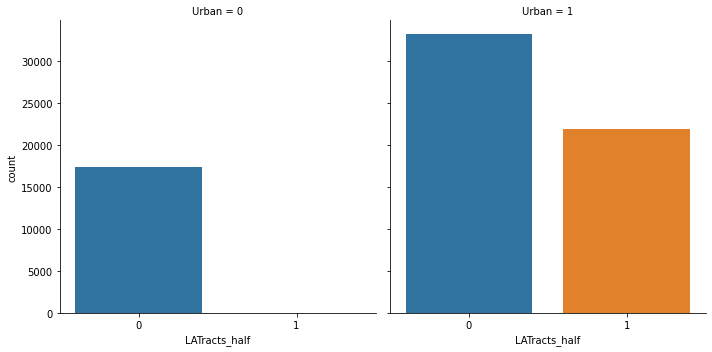

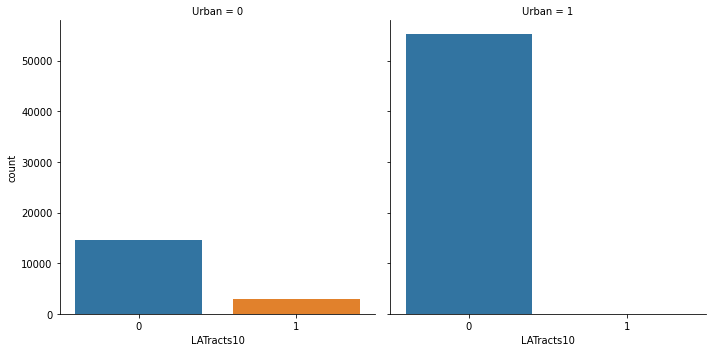

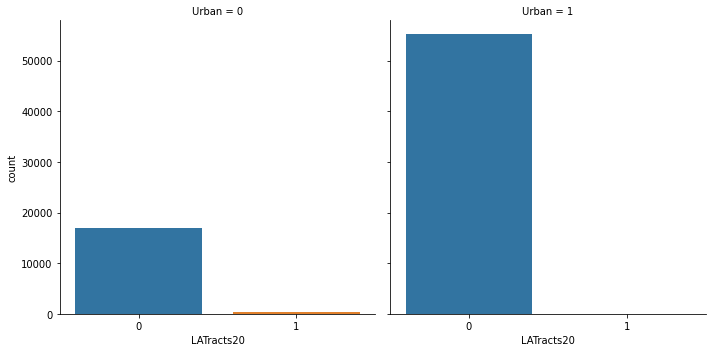

In [73]:
for i in base_flags:
  sns.catplot(x= i, col  = 'Urban'  , data =df , kind = 'count')
  
  plt.tight_layout()
  plt.savefig(i + ".png")
  plt.show()
  

## TO DO


*   Food insecurity data is 3-year aggregated data by county
*   Using transit oases/desert flags by census tracts as additional variable

